# <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie Recommendation - EDA and Processing</p>

In [333]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from random import randint

main_color = "#003672"
three_colors_palette = ["#003672", "#943400", "#ED8B75"]
five_colors_palette = ["#003672", "#943400", "#ED8B75", "#F2DC5D", "#0E9594"]
eight_colors_palette = ["#003672", "#943400", "#ED8B75", "#25044B", "#63145B", "#993365", "#C85C6C", "#ED8B75"]

S = "\033[1m" + '\033[96m' # Used for colored strings
E = "\033[0m"

## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Movie DataFrame</p>

In [334]:
movie_df = pd.read_csv("IMDB-Dataset\movies.csv", index_col="movieId")
movie_df.head()

,title,genres
movieId,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
2,Jumanji (1995),Adventure|Children|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama|Romance
5,Father of the Bride Part II (1995),Comedy


In [335]:
print(S+"Seems we have a lot of unique values for the genres, we need to do some feature engineering"+E)
movie_df.genres.unique().shape[0] , movie_df.shape[0]

Seems we have a lot of unique values for the genres, we need to do some feature engineering


(938, 10329)

## Working with genres

In [336]:
genres = []
for string in movie_df.genres.unique():
    tmp_genres = string.split("|")
    for genre in tmp_genres:
        if genre not in genres:
            genres.append(genre)

genres

['Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Fantasy',
 'Romance',
 'Drama',
 'Action',
 'Crime',
 'Thriller',
 'Horror',
 'Mystery',
 'Sci-Fi',
 'IMAX',
 'War',
 'Musical',
 'Documentary',
 'Western',
 'Film-Noir',
 '(no genres listed)']

In [337]:
print(S+"IMAX isn't really a genre, but we'll keep it to see if we get more from it.")
genres.pop() # get rid of "(no genres listed)"

IMAX isn't really a genre, but we'll keep it to see if we get more from it.


'(no genres listed)'

In [338]:
movie_df.isna().sum()

title     0
genres    0
dtype: int64

In [339]:
movie_df = movie_df.reindex(columns=list(movie_df.columns)+genres)
movie_df.head()

,title,genres,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,...,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jumanji (1995),Adventure|Children|Fantasy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Grumpier Old Men (1995),Comedy|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Waiting to Exhale (1995),Comedy|Drama|Romance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Father of the Bride Part II (1995),Comedy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [340]:
ids = movie_df.index

for i, string in zip(ids, movie_df.genres):
    tmp_genres = string.split("|")
    for genre in genres:
        if genre  in tmp_genres:
            movie_df.at[i, genre] = 1
        else :
            movie_df.at[i, genre] = 0

movie_df.drop(columns="genres", axis=1, inplace=True)

In [341]:
for genre in genres:
    movie_df[genre] = pd.to_numeric(movie_df[genre], downcast="integer")

movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## Working with dates

In [342]:
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [343]:
movie_df["Year"] = movie_df.title.str[-5:-1]
movie_df.head()

,title,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,...,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir,Year
movieId,,,,,,,,,,,,,,,,,,,,,
1,Toy Story (1995),1,1,1,1,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
2,Jumanji (1995),1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
3,Grumpier Old Men (1995),0,0,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1995
4,Waiting to Exhale (1995),0,0,0,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,1995
5,Father of the Bride Part II (1995),0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1995


In [344]:
movie_df.drop(columns="title",axis=1, inplace=True)

In [345]:
print(S+"The only things missing are standardization and reducing memory but we'll do it after the EDA"+E)

The only things missing are standardization and reducing memory but we'll do it after the EDA


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Ratings DataFrame</p>

In [346]:
ratings_df = pd.read_csv("IMDB-Dataset\\ratings.csv")
ratings_df.head()

,userId,movieId,rating,timestamp
0,1,16,4.0,1217897793
1,1,24,1.5,1217895807
2,1,32,4.0,1217896246
3,1,47,4.0,1217896556
4,1,50,4.0,1217896523


In [347]:
import datetime as dt

ratings_df.timestamp = ratings_df.timestamp.apply(dt.datetime.fromtimestamp)
ratings_df["year"] = ratings_df.timestamp.dt.strftime("%Y") # Only for the EDA
ratings_df["date"] = ratings_df.timestamp.dt.strftime("%Y-%m-%d")
ratings_df.drop(columns="timestamp", axis=1, inplace=True)
ratings_df

,userId,movieId,rating,year,date
0,1,16,4.0,2008,2008-08-05
1,1,24,1.5,2008,2008-08-05
2,1,32,4.0,2008,2008-08-05
3,1,47,4.0,2008,2008-08-05
4,1,50,4.0,2008,2008-08-05
...,...,...,...,...,...
105334,668,142488,4.0,2015,2015-12-31
105335,668,142507,3.5,2015,2015-12-31
105336,668,143385,4.0,2015,2015-11-01
105337,668,144976,2.5,2015,2015-11-27


## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">EDA</p>

### Genre count

In [348]:
genre_df = movie_df.drop(columns="Year", axis=1)
genre_df.head()

,Adventure,Animation,Children,Comedy,Fantasy,Romance,Drama,Action,Crime,Thriller,Horror,Mystery,Sci-Fi,IMAX,War,Musical,Documentary,Western,Film-Noir
movieId,,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


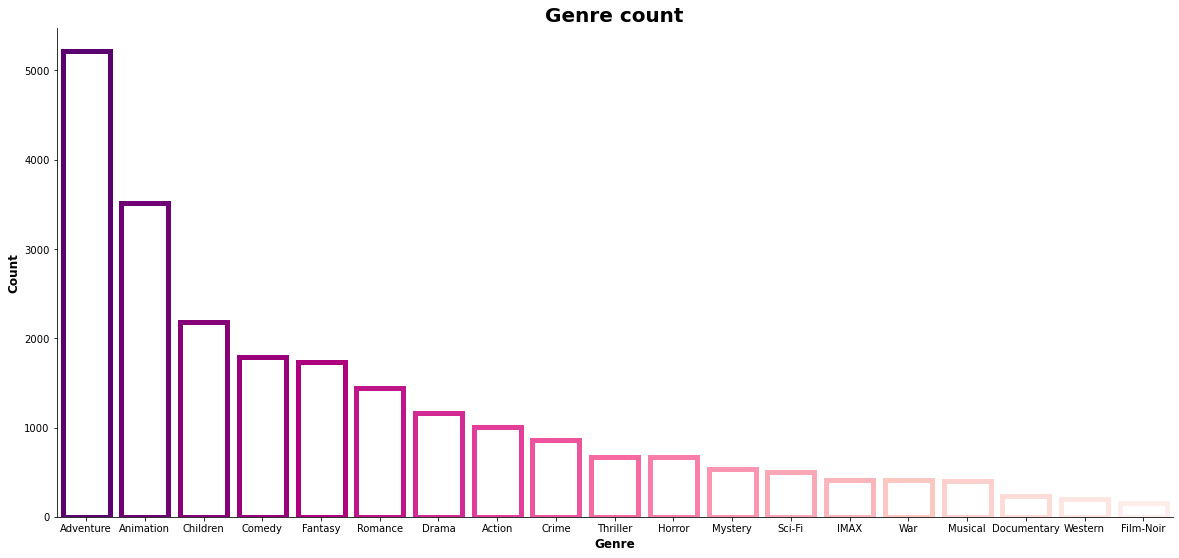

In [349]:
tmp_df = pd.melt(genre_df)[pd.melt(genre_df)["value"]==1]

plt.figure(figsize=(20,9))
sns.countplot(x="variable", hue="value", 
                   data=tmp_df,
                   facecolor=(1, 1, 1, 1),
                   linewidth=5,
                   edgecolor=sns.color_palette("RdPu_r", 19),
                   order = tmp_df['variable'].value_counts().index)

plt.xlabel("Genre", weight="bold", size = 12)
plt.ylabel("Count", weight="bold", size = 12)
plt.legend([],[], frameon=False)
plt.title("Genre count", weight="bold", size= 20)
plt.xticks(list(range(genre_df.shape[1])), genre_df.columns)
sns.despine(right=True, top=True);

del tmp_df

### Genres watched

In [350]:
df_96_to_02 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(1996,2003)))))].merge(movie_df, on="movieId")
df_03_to_09 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(2003,2010)))))].merge(movie_df, on="movieId")
df_10_to_16 = ratings_df[np.isin(ratings_df.year, list(map(str,list(range(2010,2017)))))].merge(movie_df, on="movieId")

In [351]:
watched_10_to_16 = {}
watched_03_to_09 = {}
watched_96_to_02 = {}

for genre in genres:
    for df, watched in [(df_10_to_16, watched_10_to_16), (df_03_to_09, watched_03_to_09), (df_96_to_02, watched_96_to_02)]:
        watched[genre] = df[df[genre] == 1].shape[0]


# Turn dicts into df's, sort them and get only the top three
best_10_to_16 = pd.Series(watched_10_to_16.values(), index=watched_10_to_16.keys()).sort_values(ascending=False).iloc[:4]
best_03_to_09 = pd.Series(watched_03_to_09.values(), index=watched_03_to_09.keys()).sort_values(ascending=False).iloc[:4]
best_96_to_02 = pd.Series(watched_96_to_02.values(), index=watched_96_to_02.keys()).sort_values(ascending=False).iloc[:4]

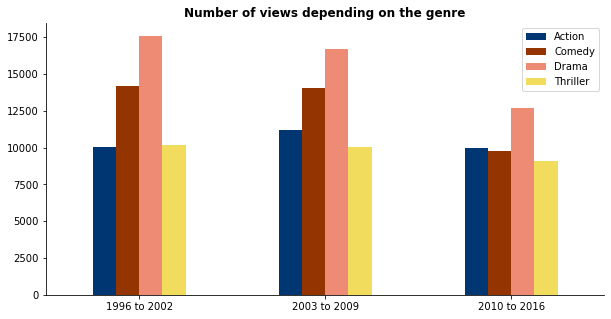

In [352]:
t = pd.concat({"1996 to 2002":best_96_to_02,
            "2003 to 2009":best_03_to_09,
            "2010 to 2016":best_10_to_16}).unstack()

ax = t.plot.bar(color=five_colors_palette, figsize=(10,5), rot=0)
plt.title("Number of views depending on the genre", weight="bold")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False);

In [353]:
print(S+"Different things can explain the fact the top genres have less view each year, but here we can see movies are generally less watched after 2010 :\n")
print("\t - From 1996 to 2002  : \t",sum(watched_96_to_02.values()))
print("\t - From 2003 to 2009  : \t",sum(watched_03_to_09.values()))
print("\t - From 2010 to 2016  : \t",sum(watched_10_to_16.values()))

Different things can explain the fact the top genres have less view each year, but here we can see movies are generally less watched after 2010 :

	 - From 1996 to 2002  : 	 98239
	 - From 2003 to 2009  : 	 101393
	 - From 2010 to 2016  : 	 82265


In [354]:
ratings_df[np.isin(ratings_df.movieId, tmp_id)]
ratings_df[np.isin(ratings_df.year, list(map(str,list(range(1996,2003)))))]

,userId,movieId,rating,year,date
113,2,1,5.0,1997,1997-03-22
114,2,3,2.0,1997,1997-03-22
115,2,5,3.0,1997,1997-03-22
116,2,14,4.0,1997,1997-03-22
117,2,17,5.0,1997,1997-03-22
...,...,...,...,...,...
101936,668,5965,4.0,2002,2002-12-18
101941,668,5981,3.0,2002,2002-12-18
101942,668,5983,4.0,2002,2002-12-18
101950,668,6001,4.0,2002,2002-12-18


### Single customer analysis

In [355]:
# random_id = randint(1,668)
id = 622

customer_df = ratings_df[ratings_df.userId == id].movieId
customer_df.value_counts()

97        1
92938     1
92192     1
91658     1
91630     1
         ..
45501     1
45447     1
44972     1
44199     1
146878    1
Name: movieId, Length: 331, dtype: int64

## <p style="background-color:#003672;font-family:newtimeroman;color:#FFF9ED;font-size:150%;text-align:center;border-radius:10px 10px;">Final touch</p>

In [356]:
ratings_df.drop(columns="year", inplace=True)

In [357]:
movie_df.Year = pd.to_numeric(movie_df.Year, errors="coerce")
movie_df.dropna(inplace=True) # 2 rows didn't have any Year

In [358]:
def reduce_memory_usage(df, verbose=True):
    numerics = ["int8", "int16", "int32", "int64", "float16", "float32", "float64"]
    start_mem = df.memory_usage().sum() / 1024 ** 2
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == "int":
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if (
                    c_min > np.finfo(np.float16).min
                    and c_max < np.finfo(np.float16).max
                ):
                    df[col] = df[col].astype(np.float16)
                elif (
                    c_min > np.finfo(np.float32).min
                    and c_max < np.finfo(np.float32).max
                ):
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
    end_mem = df.memory_usage().sum() / 1024 ** 2
    if verbose:
        string = S+"Mem. usage decreased from {:.2f} Mb to {:.2f} Mb ({:.1f}% reduction)"+E
        print(
            string.format(
                start_mem, end_mem, 100 * (start_mem - end_mem) / start_mem
            )
        )
    return df

In [359]:
ratings_df = reduce_memory_usage(ratings_df)
movie_df = reduce_memory_usage(movie_df)

Mem. usage decreased from 3.21 Mb to 1.61 Mb (50.0% reduction)
Mem. usage decreased from 0.34 Mb to 0.29 Mb (17.1% reduction)


In [361]:
ratings_df.to_csv("data/ratings.csv")
movie_df.to_csv("data/movie.csv")